<a href="https://colab.research.google.com/github/Hey-El/Sentiment-Analysis-Python/blob/main/BERTopic_most_reviewed_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
!pip install bertopic
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install transformers
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Pack

True

In [3]:
from bertopic import BERTopic

In [4]:
topic_model = BERTopic(embedding_model = 'paraphrase-MiniLM-L6-v2')

In [5]:

df=pd.read_excel('/content/DrugReview.xlsx')
df.info

<bound method DataFrame.info of        Unnamed: 0         drugName                     condition  \
0          163740      Mirtazapine                    Depression   
1          206473       Mesalamine  Crohn's Disease, Maintenance   
2          159672          Bactrim       Urinary Tract Infection   
3           39293         Contrave                   Weight Loss   
4           97768  Cyclafem 1 / 35                 Birth Control   
...           ...              ...                           ...   
53761      159999        Tamoxifen     Breast Cancer, Prevention   
53762      140714     Escitalopram                       Anxiety   
53763      130945   Levonorgestrel                 Birth Control   
53764       47656       Tapentadol                          Pain   
53765      113712        Arthrotec                      Sciatica   

                                                  review  rating  \
0      "I&#039;ve tried a few antidepressants over th...      10   
1      "My son 

In [6]:
df_unique =df['drugName'].nunique()
df_unique

2637

In [7]:


# Column name for which you want to extract unique values
column_name = 'drugName'

# Get unique values from the specified column and store them in a list
unique_values_list = df[column_name].unique().tolist()
# Group reviews by the 'drugname' column
grouped = df.groupby('drugName')['review'].apply(list).reset_index()
print(grouped)

                                  drugName  \
0                               A / B Otic   
1     Abacavir / dolutegravir / lamivudine   
2                    Abacavir / lamivudine   
3                                Abatacept   
4                                  Abilify   
...                                    ...   
2632                               ZzzQuil   
2633                 depo-subQ provera 104   
2634                                  ella   
2635                                femhrt   
2636                              pHisoHex   

                                                 review  
0     ["These drops helped me so much. I was in seve...  
1     ["I discovered my new status in July 2017 VL 9...  
2     ["I&#039;ve used this since first diagnosed an...  
3     ["In UK had this on NHS for last 7 months. Imp...  
4     ["After having to pay a but load out of pocket...  
...                                                 ...  
2632            ["Gave me rapid heart bea

In [8]:
# Group reviews by the 'drugname' column and count the reviews
grouped = df.groupby('drugName')['review'].count().reset_index()
grouped.rename(columns={'review': 'num_reviews'}, inplace=True)
grouped




,drugName,num_reviews
0,A / B Otic,1
1,Abacavir / dolutegravir / lamivudine,18
2,Abacavir / lamivudine,3
3,Abatacept,6
4,Abilify,147
...,...,...
2632,ZzzQuil,1
2633,depo-subQ provera 104,1
2634,ella,20
2635,femhrt,3


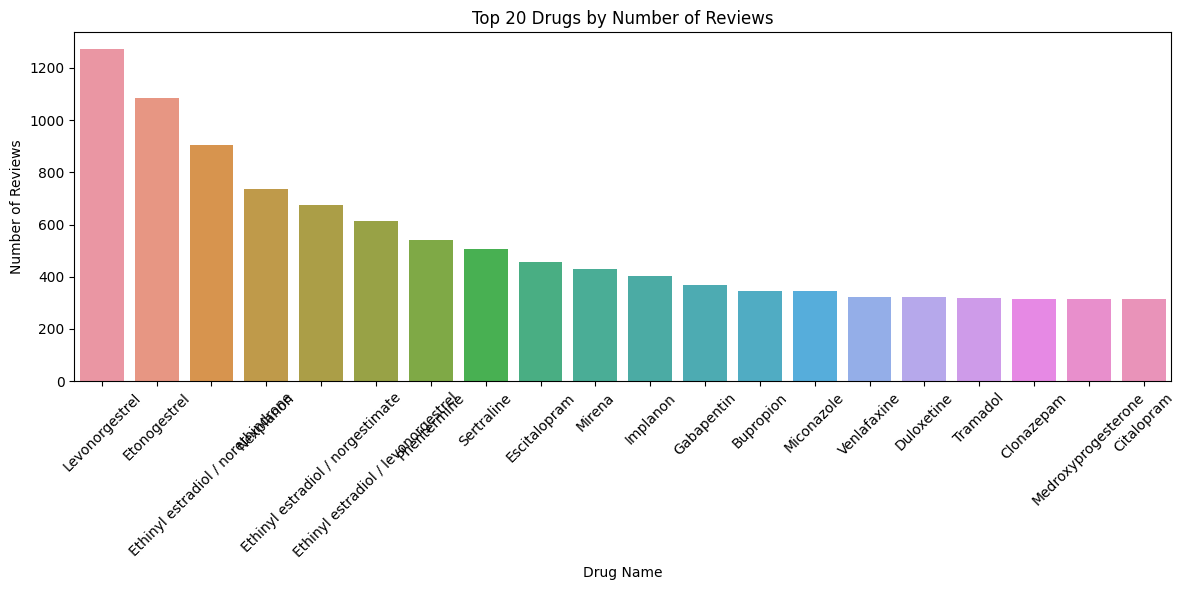

In [9]:
# Sort drugs by the number of reviews
grouped_sorted = grouped.sort_values(by='num_reviews', ascending=False)

# Select top 20 drugs that are most reviewed for visualization
top_n = 20
top_drugs = grouped_sorted.head(top_n)

# Create a bar plot using seaborn for top N drugs
plt.figure(figsize=(12, 6))
sns.barplot(x='drugName', y='num_reviews', data=top_drugs)
plt.xlabel('Drug Name')
plt.ylabel('Number of Reviews')
plt.title(f'Top {top_n} Drugs by Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [10]:
# Sort drugs by the number of reviews
grouped_sorted = grouped.sort_values(by='num_reviews', ascending=False)

# Select top 20 drugs that are most reviewed for visualization
top_n = 20
top_drugs = grouped_sorted.head(top_n)
top_drugs

,drugName,num_reviews
1349,Levonorgestrel,1273
920,Etonogestrel,1085
914,Ethinyl estradiol / norethindrone,903
1658,Nexplanon,736
915,Ethinyl estradiol / norgestimate,673
912,Ethinyl estradiol / levonorgestrel,615
1854,Phentermine,542
2136,Sertraline,508
885,Escitalopram,455
1560,Mirena,431


In [11]:
# Specify the drug name you want to analyze
specific_drug = 'Levonorgestrel'

# Filter the DataFrame for the specific drug
filtered_df = df[df['drugName'] == specific_drug]

# Create a BERTopic model
topic_model = BERTopic()

# Fit the BERTopic model and transform the filtered reviews
topics, probs = topic_model.fit_transform(filtered_df['review'])

In [12]:
topic_model.visualize_barchart()

In [17]:

# Define a function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS])

# Remove stopwords from the 'review' column in the DataFrame
df['review_text_without_stopwords'] = filtered_df['review'].apply(remove_stopwords)

df['review_text_without_stopwords']

# Check for NaN values in 'review_text_without_stopwords' column
nan_rows = df[df['review_text_without_stopwords'].isna()]
if not nan_rows.empty:
    # Handle NaN values (e.g., fill with empty strings or remove rows)
    df['review_text_without_stopwords'].fillna('', inplace=True)

df['review_text_without_stopwords']

# Fit BERTopic on the 'review_text_without_stopwords' column
topics, _ = topic_model.fit_transform(df['review_text_without_stopwords'])

# Add the topics to the DataFrame
df['topics'] = topics

# Print the results
df['topics']











0        1518
1        2404
2        1779
3         128
4          57
         ... 
53761      -1
53762     852
53763      -1
53764     806
53765    2160
Name: topics, Length: 53766, dtype: int64

In [18]:
topic_model.visualize_barchart()